# PQC Haar Measure

In [4]:
import sys
sys.path.insert(0, '../../src_tf/')

import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
import multiprocessing as mp
import random
import pickle

from qiskit.quantum_info import DensityMatrix, random_unitary
from qiskit.quantum_info import Operator
from scipy.linalg import sqrtm
from tqdm.notebook import tqdm

from loss_functions import *
from optimization import *
from quantum_channel import *
from quantum_tools import *
from experimental import *
from spam import *

#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=4)

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [5]:
def pqc(n, L):
    theta_list = [np.random.uniform(-np.pi, np.pi, 2*n) for i in range(L)]
    circuit = qk.QuantumCircuit(n)
    for theta in theta_list:
        for i in range(n):
            circuit.ry(theta[i], i)
            circuit.rz(theta[i+n], i)

        for i in range(n-1):
            circuit.cx(i, i+1)
            
    return circuit

In [6]:
print(pqc(3, 3))

      ┌────────────┐ ┌────────────┐      ┌────────────┐ ┌────────────┐»
q_0: ─┤ Ry(2.7525) ├─┤ Rz(1.1782) ├───■──┤ Ry(2.3434) ├─┤ Rz(2.5464) ├»
     ┌┴────────────┤┌┴────────────┴┐┌─┴─┐└────────────┘┌┴────────────┤»
q_1: ┤ Ry(-2.4622) ├┤ Rz(-0.49345) ├┤ X ├──────■───────┤ Ry(0.71236) ├»
     └┬────────────┤└┬────────────┬┘└───┘    ┌─┴─┐     └┬────────────┤»
q_2: ─┤ Ry(1.3203) ├─┤ Rz(1.9475) ├──────────┤ X ├──────┤ Ry(1.5407) ├»
      └────────────┘ └────────────┘          └───┘      └────────────┘»
«                        ┌───────────┐┌──────────────┐                         
«q_0: ────────────────■──┤ Ry(1.277) ├┤ Rz(-0.23064) ├─────────────────■───────
«     ┌────────────┐┌─┴─┐└───────────┘├─────────────┬┘ ┌────────────┐┌─┴─┐     
«q_1: ┤ Rz(2.7486) ├┤ X ├──────■──────┤ Ry(-1.0577) ├──┤ Rz(2.4462) ├┤ X ├──■──
«     ├────────────┤└───┘    ┌─┴─┐    ├─────────────┴┐┌┴────────────┤└───┘┌─┴─┐
«q_2: ┤ Rz(3.1107) ├─────────┤ X ├────┤ Ry(-0.30079) ├┤ Rz(-1.1137) ├─────┤ X ├
«     └─────────

In [11]:
n = 3
d = 2**n

np.random.seed(42)
random.seed(42)

fid_list = []
bins = np.linspace(0, 1, 75)

F = (bins[1:] + bins[:-1])/2
P_Haar = (d - 1)*(1-F)**(d-2)
P_Haar = P_Haar/np.sum(P_Haar)

KL_list = []
for L in range(1, 11):
    for i in tqdm(range(10000)):
        U1 = Operator(pqc(n, L)).data
        U2 = Operator(pqc(n, L)).data
        fid = U1.T.conj()@U2
        fid_list.append(np.abs(fid[0,0])**2)
    
    P_pqc, bins = np.histogram(np.array(fid_list), bins = np.linspace(0, 1, 75))
    P_pqc = P_pqc/np.sum(P_pqc)
    KL = np.sum(P_pqc*np.log((P_pqc + 1e-32)/P_Haar))
    
    KL_list.append(KL)

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

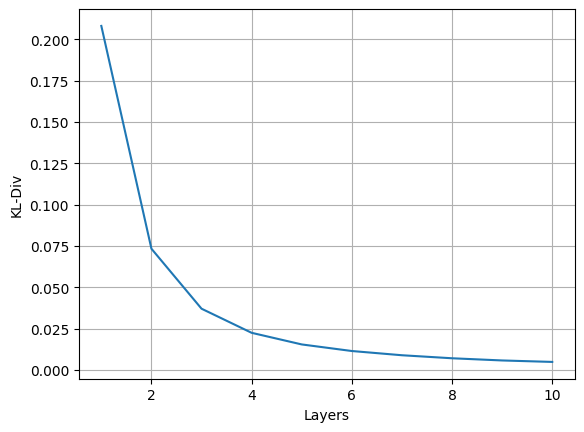

In [15]:
plt.plot(list(range(1,11)), KL_list)
plt.grid()
plt.xlabel("Layers")
plt.ylabel("KL-Div")
plt.show()

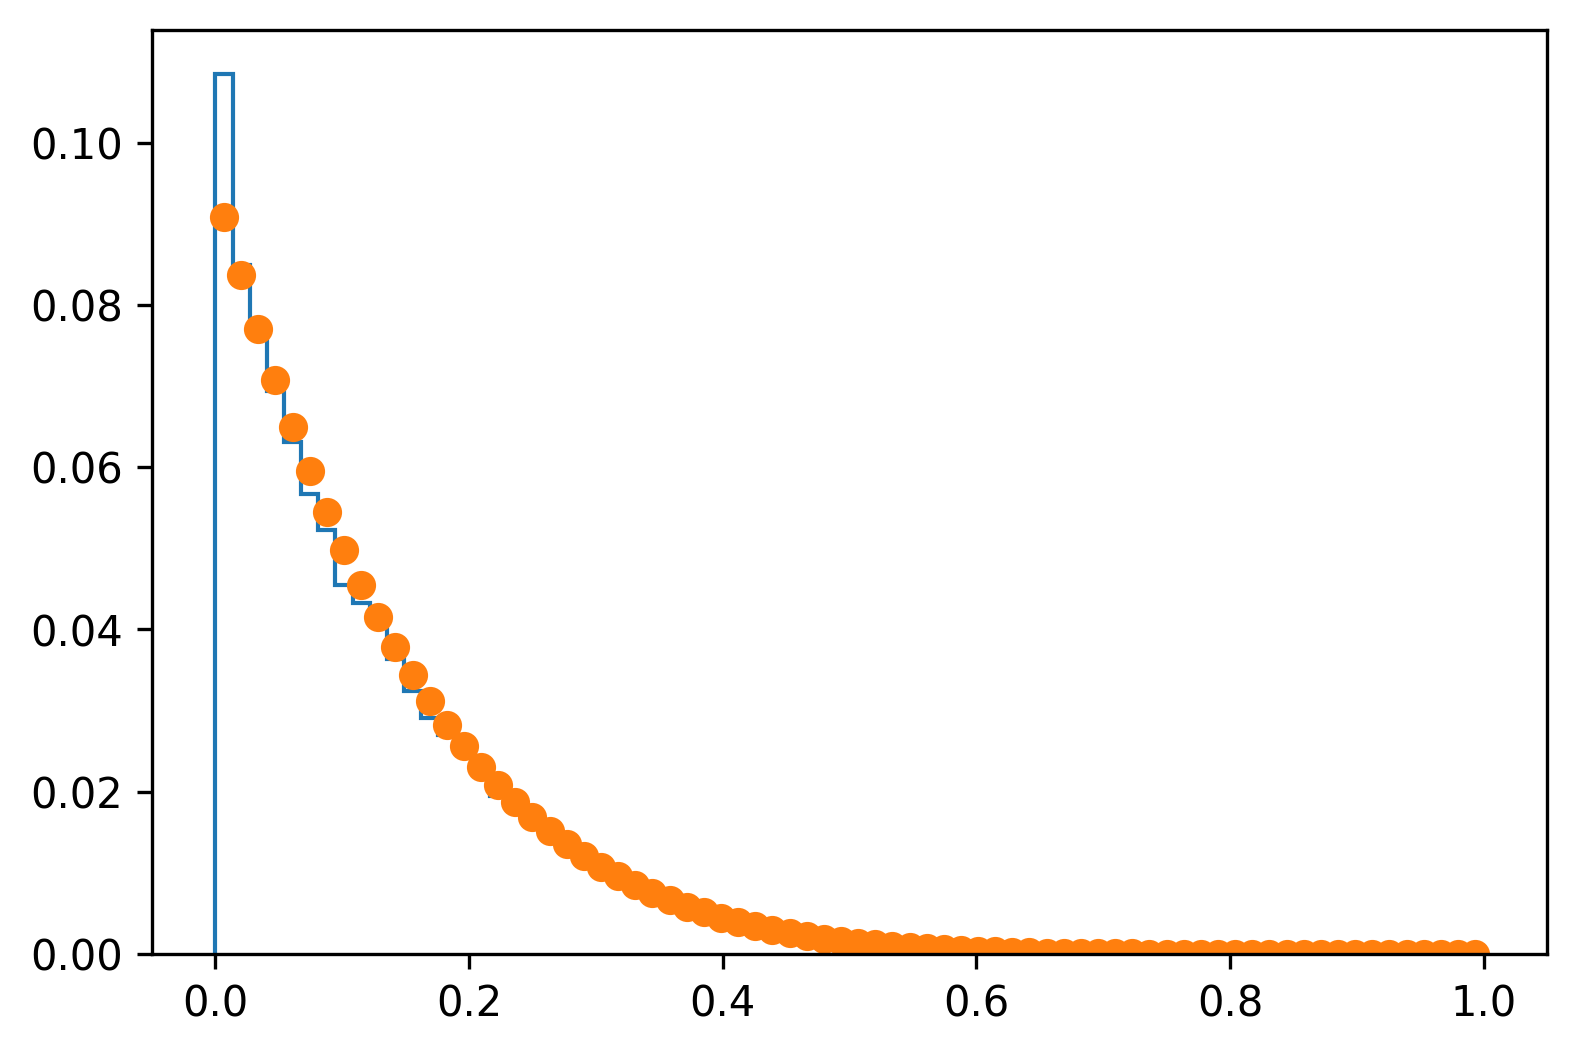

In [13]:
fig=plt.figure(figsize=(6,4), dpi = 300, facecolor='w', edgecolor='k')

plt.stairs(P_pqc, bins)
plt.plot(F, P_Haar, "o")
plt.show()

In [3]:
n = 4
d = 2**n

np.random.seed(42)
random.seed(42)

fid_list = []
bins = np.linspace(0, 1, 75)

F = (bins[1:] + bins[:-1])/2
P_Haar = (d - 1)*(1-F)**(d-2)
P_Haar = P_Haar/np.sum(P_Haar)

KL_list = []
for L in range(4, 5):
    for i in tqdm(range(10000)):
        U1 = Operator(pqc(n, L)).data
        U2 = Operator(pqc(n, L)).data
        fid = U1.T.conj()@U2
        fid_list.append(np.abs(fid[0,0])**2)
    
    P_pqc, bins = np.histogram(np.array(fid_list), bins = np.linspace(0, 1, 75))
    P_pqc = P_pqc/np.sum(P_pqc)
    KL = np.sum(P_pqc*np.log((P_pqc + 1e-32)/P_Haar))
    
    KL_list.append(KL)

  0%|          | 0/10000 [00:00<?, ?it/s]

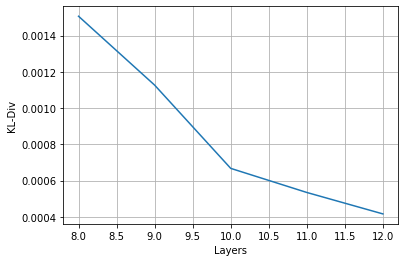

In [7]:
plt.plot(list(range(4, 5), KL_list)
plt.grid()
plt.xlabel("Layers")
plt.ylabel("KL-Div")
plt.show()

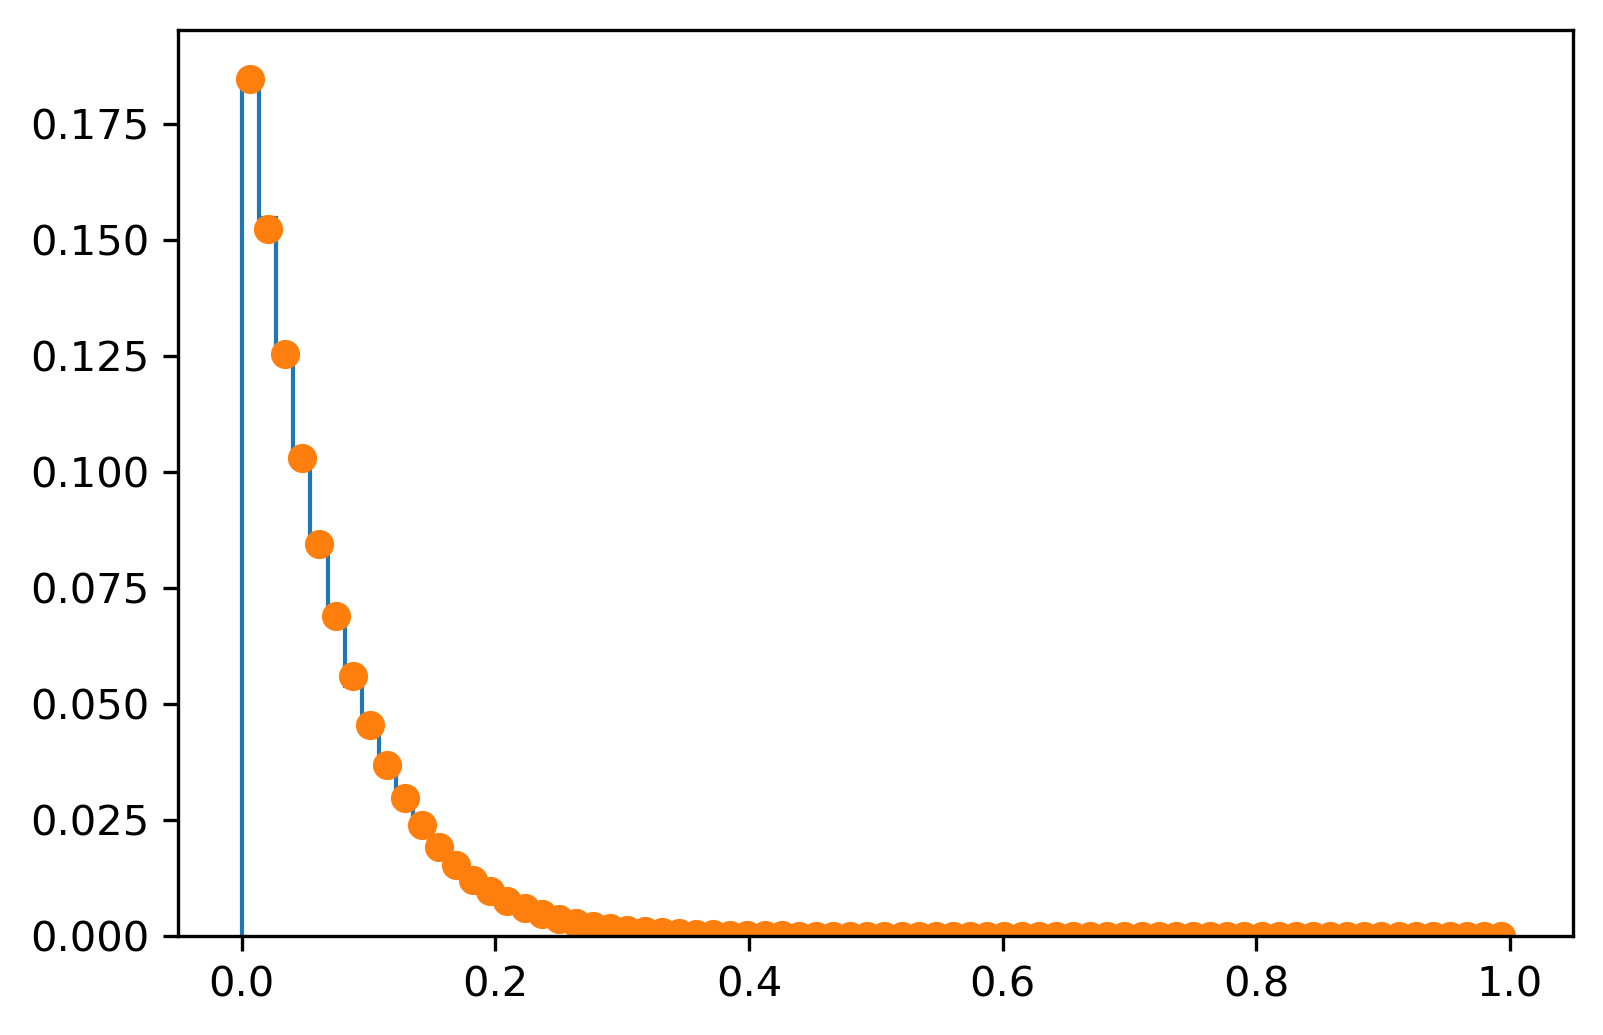

In [8]:
fig=plt.figure(figsize=(6,4), dpi = 300, facecolor='w', edgecolor='k')

plt.stairs(P_pqc, bins)
plt.plot(F, P_Haar, "o")
plt.show()